In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns

In [2]:
HORIZON = 24
data = pd.read_csv("..\EURGBP UMAP Candlestick Recognition.csv")
data['Target'] = data['True Close'].shift(-HORIZON) - data['True Close']
data['Class'] = 0
data.loc[data['Target'] > 0,'Class'] = 1
data.dropna(inplace=True)
data

Time  True Close     Open     High      Low    Close  \
0     2002.10.01 00:00:00     0.62880 -0.00630 -0.00860 -0.00740 -0.00790   
1     2002.10.02 00:00:00     0.62880 -0.00800 -0.00800 -0.00610 -0.00520   
2     2002.10.03 00:00:00     0.62860 -0.00550 -0.00560 -0.00410 -0.00510   
3     2002.10.04 00:00:00     0.62580 -0.00480 -0.00480 -0.00360 -0.00350   
4     2002.10.06 00:00:00     0.62620 -0.00410 -0.00380 -0.00350 -0.00390   
...                   ...         ...      ...      ...      ...      ...   
6970  2025.02.18 00:00:00     0.82761 -0.01424 -0.01531 -0.01652 -0.01572   
6971  2025.02.19 00:00:00     0.82817 -0.01572 -0.01746 -0.01604 -0.01704   
6972  2025.02.20 00:00:00     0.82878 -0.01705 -0.01659 -0.01535 -0.01432   
6973  2025.02.21 00:00:00     0.82807 -0.01431 -0.01704 -0.01387 -0.01260   
6974  2025.02.23 00:00:00     0.82803 -0.01230 -0.01185 -0.01273 -0.01215   

        O - H    O - L    O - C    H - L    H - C    L - C   Target  Class  
0    -0.00100  0.00190 -0.00020  0.00290  0.00080 -0.00210  0.00250      1  
1    -0.00080  0.00180 -0.00010  0.00260  0.00070 -0.00190  0.00350      1  
2    -0.00170  0.00070  0.00020  0.00240  0.00190 -0.00050  0.00400      1  
3    -0.00090  0.00400  0.00290  0.00490  0.00380 -0.00110  0.01100      1  
4    -0.00100  0.00000 -0.00060  0.00100  0.00040 -0.00060  0.01120      1  
...       ...      ...      ...      ...      ...      ...      ...    ...  
6970 -0.00018  0.00415  0.00313  0.00433  0.00331 -0.00102  0.01381      1  
6971 -0.00131  0.00033 -0.00056  0.00164  0.00075 -0.00089  0.01048      1  
6972 -0.00103  0.00116 -0.00062  0.00219  0.00041 -0.00178  0.00833      1  
6973 -0.00040  0.00227  0.00072  0.00267  0.00112 -0.00155  0.00921      1  
6974 -0.00085  0.00070 -0.00006  0.00155  0.00079 -0.00076  0.01030      1  

[6975 rows x 14 columns]

In [3]:
#Delete all the data that overlaps with our back test
data = data.iloc[:(-(365 * 5) + (31 * 5)),:]
data

Time  True Close     Open     High      Low    Close  \
0     2002.10.01 00:00:00     0.62880 -0.00630 -0.00860 -0.00740 -0.00790   
1     2002.10.02 00:00:00     0.62880 -0.00800 -0.00800 -0.00610 -0.00520   
2     2002.10.03 00:00:00     0.62860 -0.00550 -0.00560 -0.00410 -0.00510   
3     2002.10.04 00:00:00     0.62580 -0.00480 -0.00480 -0.00360 -0.00350   
4     2002.10.06 00:00:00     0.62620 -0.00410 -0.00380 -0.00350 -0.00390   
...                   ...         ...      ...      ...      ...      ...   
5300  2019.10.11 00:00:00     0.87239 -0.01097 -0.01054 -0.01609 -0.01323   
5301  2019.10.13 00:00:00     0.87406 -0.01359 -0.01275 -0.01307 -0.01284   
5302  2019.10.14 00:00:00     0.87445 -0.01282 -0.00909 -0.01278 -0.01107   
5303  2019.10.15 00:00:00     0.86472 -0.01105 -0.01383 -0.02146 -0.02105   
5304  2019.10.16 00:00:00     0.86380 -0.02102 -0.01645 -0.02228 -0.02069   

        O - H    O - L    O - C    H - L    H - C    L - C   Target  Class  
0    -0.00100  0.00190 -0.00020  0.00290  0.00080 -0.00210  0.00250      1  
1    -0.00080  0.00180 -0.00010  0.00260  0.00070 -0.00190  0.00350      1  
2    -0.00170  0.00070  0.00020  0.00240  0.00190 -0.00050  0.00400      1  
3    -0.00090  0.00400  0.00290  0.00490  0.00380 -0.00110  0.01100      1  
4    -0.00100  0.00000 -0.00060  0.00100  0.00040 -0.00060  0.01120      1  
...       ...      ...      ...      ...      ...      ...      ...    ...  
5300 -0.00114  0.01627  0.01339  0.01741  0.01453 -0.00288 -0.01018      0  
5301 -0.00152  0.00059 -0.00141  0.00211  0.00011 -0.00200 -0.01261      0  
5302 -0.00706  0.00254 -0.00038  0.00960  0.00668 -0.00292 -0.01601      0  
5303 -0.00064  0.01207  0.00974  0.01271  0.01038 -0.00233 -0.00784      0  
5304 -0.00691  0.00499  0.00093  0.01190  0.00784 -0.00406 -0.00727      0  

[5305 rows x 14 columns]

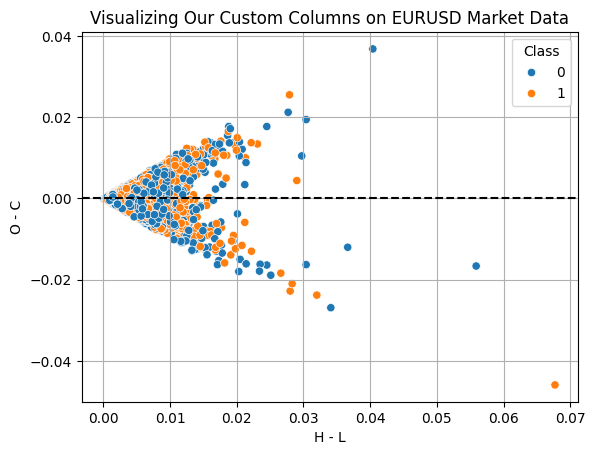

In [4]:
sns.scatterplot(
    data=data,
    y='O - C',
    x='H - L',
    hue='Class'
)

plt.grid()
plt.title("Visualizing Our Custom Columns on EURUSD Market Data")
plt.axhline(0,color='black',linestyle='--')


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1887: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


Text(0.5, 1.0, 'Visualizing the effects of UMAP on our EURUSD Market Data')

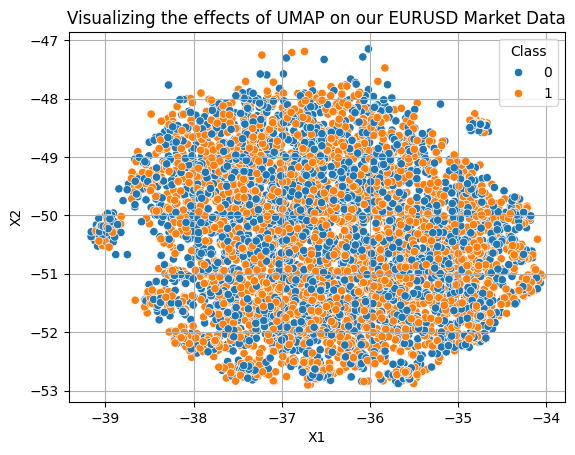

In [10]:
reducer = umap.UMAP(n_neighbors=100,metric="hamming")

embedding = reducer.fit_transform(data.iloc[:,2:-2])
embedding = pd.DataFrame(embedding,columns=['X1','X2'])
embedding['Class'] = data['Class']

sns.scatterplot(
    data=embedding,
    x='X1',
    y='X2',
    hue='Class'
)

plt.grid()
plt.title("Visualizing the effects of UMAP on our EURUSD Market Data")


In [11]:
def return_transformed_data(n_components):
    HORIZON = 24
    data = pd.read_csv("..\EURGBP UMAP Candlestick Recognition.csv")
    data['Target'] = data['True Close'].shift(-HORIZON) - data['True Close']
    data.dropna(inplace=True)
    data = data.iloc[:(-(365 * 5) + (31 * 5)),:]
    reducer = umap.UMAP(n_neighbors=100,metric="euclidean",n_components=n_components,n_jobs=-1)
    embedding = reducer.fit_transform(data.iloc[:,2:-1])
    cols = []
    for i in np.arange(n_components):
        s = 'X' + ' ' + str(i)
        cols.append(s)
    
    embedding = pd.DataFrame(embedding,columns=cols)
    return embedding.copy()

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

In [5]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [30]:
LEVELS = 8
res = pd.DataFrame(columns=['X'],index=np.arange(LEVELS))

for i in range(LEVELS):
    new_data = return_transformed_data(i+1)
    res.iloc[i,0] = np.mean(np.abs(cross_val_score(GradientBoostingRegressor(),new_data.iloc[:,0:],data['Target'],cv=tscv)))

In [36]:
res['X'] = pd.to_numeric(res['X'], errors='coerce')
min_value = min(res.iloc[:,0])
min_index = res['X'].idxmin()

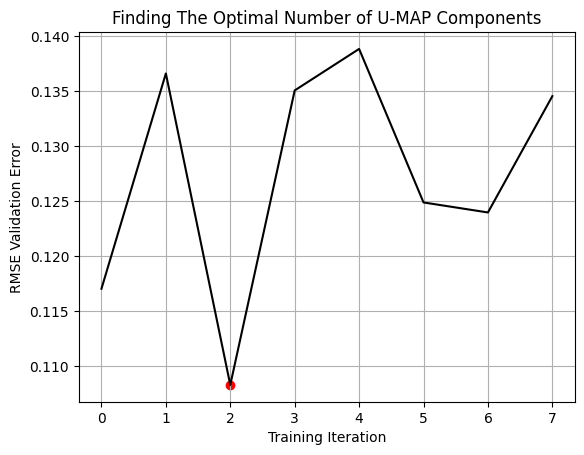

In [37]:
plt.plot(res,color='black')
plt.grid()
plt.title('Finding The Optimal Number of U-MAP Components')
plt.ylabel('RMSE Validation Error')
plt.xlabel('Training Iteration')
plt.scatter(min_index,min_value,color='red')

In [38]:
classic_error = np.mean(np.abs(cross_val_score(GradientBoostingRegressor(),data.iloc[:,2:-2],data['Target'],cv=tscv)))

Text(0.5, 1.0, 'UMAP Transformations Are Helping Us Reduce Our Error Rates')

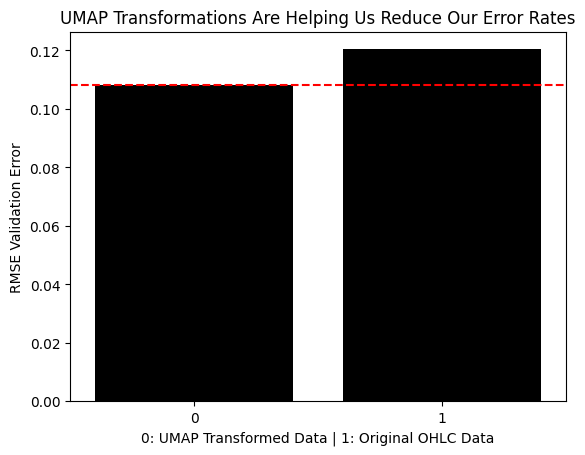

In [39]:
results = [min(res.iloc[:,0]),classic_error]

sns.barplot(results,color='black')
plt.axhline(results[0],color='red',linestyle='--')
plt.ylabel('RMSE Validation Error')
plt.xlabel('0: UMAP Transformed Data | 1: Original OHLC Data')
plt.title("UMAP Transformations Are Helping Us Reduce Our Error Rates")

In [6]:
from sklearn.neural_network import MLPRegressor

In [ ]:
new_data = return_transformed_data(3)

In [75]:
LEVELS = 18
NN_ERROR = pd.DataFrame(columns=['Error'],index=np.arange(LEVELS))

for i in range(LEVELS):
    model = MLPRegressor(hidden_layer_sizes=(data.iloc[:,2:-2].shape[1],10,5),max_iter=(2 ** i),solver='adam')
    NN_ERROR.iloc[i,0] =  np.mean(np.abs(cross_val_score(model,new_data,data['Target'],cv=tscv)))


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the 

Text(0.5, 1.0, 'Minimizing The Error of Our Neural Network')

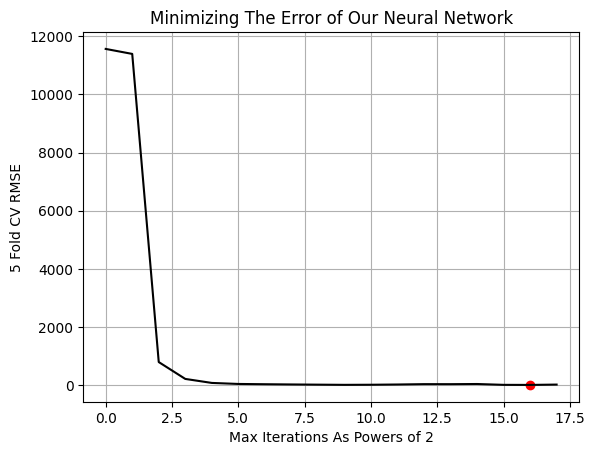

In [77]:
NN_ERROR['Error'] = pd.to_numeric(NN_ERROR['Error'], errors='coerce')
min_idx   = NN_ERROR.idxmin()
min_value = NN_ERROR.min()

plt.plot(NN_ERROR,color='black')
plt.grid()
plt.ylabel('5 Fold CV RMSE')
plt.xlabel('Max Iterations As Powers of 2')
plt.scatter(min_idx,min_value,color='red')
plt.title('Minimizing The Error of Our Neural Network')

In [85]:
#The first model will transform the given market data into its UMAP embeddings
umap_transform_model = MLPRegressor(hidden_layer_sizes=(data.iloc[:,2:-2].shape[1],10,5),max_iter=int(2 ** min_idx),solver='adam')
umap_transform_model.fit(data.iloc[:,2:-2],new_data)

MLPRegressor(hidden_layer_sizes=(10, 10, 5), max_iter=65536)

In [86]:
#The second model will forecast the future EURGBP returns, given UMAP embeddings
forecast_model = MLPRegressor(hidden_layer_sizes=(new_data.shape[1],10,5),max_iter=int(2 ** min_idx),solver='adam')
forecast_model.fit(new_data,data['Target'])

MLPRegressor(hidden_layer_sizes=(3, 10, 5), max_iter=65536)

In [7]:
import onnx
import netron
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [98]:
umap_transform_shape = [("float_input",FloatTensorType([1,data.iloc[:,2:-2].shape[1]]))]
umap_transform_output_shape = [("float_output",FloatTensorType([new_data.shape[1],1]))]

In [99]:
forecast_shape = [("float_input",FloatTensorType([1,new_data.shape[1]]))]

In [100]:
umap_model_proto = convert_sklearn(umap_transform_model,initial_types=umap_transform_shape,final_types=umap_transform_output_shape,target_opset=12)
forecast_model_proto = convert_sklearn(forecast_model,initial_types=forecast_shape,target_opset=12)

In [101]:
onnx.save(umap_model_proto,"EURGBP UMAP.onnx")
onnx.save(forecast_model_proto,"EURGBP UMAP Forecast.onnx")

Let's also build a probablistic model of the market.

In [8]:
EPOCHS = 20
ERROR  = pd.DataFrame(columns=['Error'],index=range(EPOCHS))

for i in range(EPOCHS):
    model = MLPRegressor(hidden_layer_sizes=(data.iloc[:,2:-2].shape[1],20,10),
                         early_stopping=False,
                         max_iter=(2 ** i),
                         solver='sgd',
                         alpha=0.9,
                         shuffle=False,
                         random_state=5,
                         learning_rate='invscaling',
                         learning_rate_init=0.001,
                         momentum=0.9,
                         power_t=0.1
                         )
    ERROR.iloc[i,0] = np.mean(np.abs(cross_val_score(model,data.iloc[:,2:-2],data['Class'],cv=tscv)))

ERROR


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the 

Error
0   0.068933
1   0.051071
2     0.0387
3    0.02981
4   0.024683
5    0.02393
6    0.02393
7    0.02393
8    0.02393
9    0.02393
10   0.02393
11   0.02393
12   0.02393
13   0.02393
14   0.02393
15   0.02393
16   0.02393
17   0.02393
18   0.02393
19   0.02393

In [9]:
ERROR.iloc[:,0] = pd.to_numeric(ERROR.iloc[:,0],errors='coerce')

C:\Users\Westwood\AppData\Local\Temp\ipykernel_2688\2178348785.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ERROR.iloc[:,0] = pd.to_numeric(ERROR.iloc[:,0],errors='coerce')


Text(0.5, 0, 'Training Epochs Are Powers of 2')

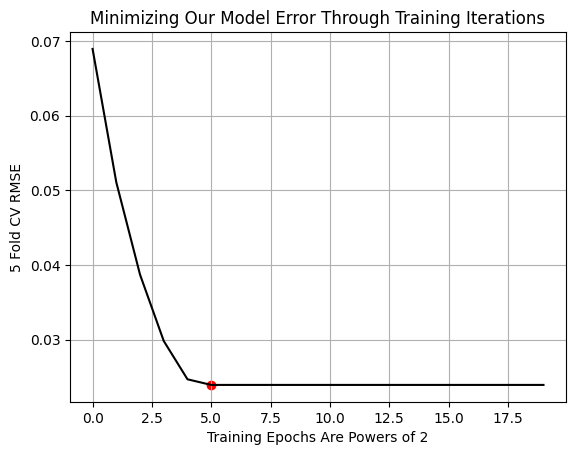

In [10]:
plt.plot(ERROR,color='black')
plt.scatter(ERROR.idxmin(),ERROR.min(),color='red')
plt.grid()
plt.title('Minimizing Our Model Error Through Training Iterations')
plt.ylabel('5 Fold CV RMSE')
plt.xlabel('Training Epochs Are Powers of 2')


In [11]:
def objective(x):
    model = MLPRegressor(hidden_layer_sizes=(data.iloc[:,2:-2].shape[1],20,10),
                         solver='sgd',
                         early_stopping=False,
                         max_iter=(2 ** 5),
                         shuffle=False,
                         random_state=5,
                         learning_rate='invscaling',
                         alpha=x[0],
                         learning_rate_init=x[1],
                         power_t=x[2],
                         momentum=x[3]
                         )
    loss = np.mean(np.abs(cross_val_score(model,data.iloc[:,2:-2],data['Class'],cv=tscv)))
    return((loss))

In [12]:
#0 - Alpha bust be within the range [0,inf)
#1 - Learning rate init must be within (0,inf)
#3 - Power t must be within the range [0,inf)
#4 - Momentum must be within the range [0,1]
inputs = [0.9,0.001,0.1,0.9]
objective(inputs)

0.023930155804478704

In [13]:
bounds = [(0,1),(1e-5,1e-1),(0,1e-5),(0,1)]

In [14]:
from scipy.optimize import minimize

In [15]:
res = minimize(objective,inputs,method='nelder-mead',bounds=bounds)

C:\Users\Westwood\AppData\Local\Temp\ipykernel_2688\3594857612.py:1: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(objective,inputs,method='nelder-mead',bounds=bounds)
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\

Text(0.5, 0, 'Key: 0 Default Model | 1 Nelder-Mead Optimized Model')

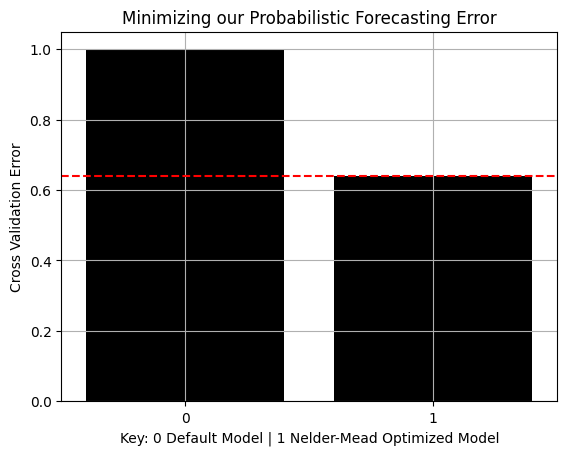

In [16]:
e1 = ERROR.min()[0] / ERROR.min()[0]
e2 = res.fun / ERROR.min()[0]
sns.barplot([e1,e2],color='black')
plt.grid()
plt.title('Minimizing our Probabilistic Forecasting Error')
plt.axhline(e2,color='red',linestyle='--')
plt.ylabel('Cross Validation Error')
plt.xlabel('Key: 0 Default Model | 1 Nelder-Mead Optimized Model')

In [17]:
x = res.x

In [18]:
model = MLPRegressor(
                    hidden_layer_sizes=(data.iloc[:,2:-2].shape[1],20,10),
                    solver='sgd',
                    early_stopping=False,
                    max_iter=(2 ** i),
                    shuffle=False,
                    random_state=5,
                    learning_rate='invscaling',
                    alpha=x[0],
                    learning_rate_init=x[1],
                    power_t=x[2],
                    momentum=x[3]
                    )

In [19]:
model.fit(data.iloc[:,2:-2],data['Class'])

MLPRegressor(alpha=0.8215867331857183, hidden_layer_sizes=(10, 20, 10),
             learning_rate='invscaling',
             learning_rate_init=0.001113078556083915, max_iter=524288,
             momentum=1.0, power_t=1e-05, random_state=5, shuffle=False,
             solver='sgd')

In [20]:
prob_initial_types = [("float input",FloatTensorType([1,data.iloc[:,2:-2].shape[1]]))]

In [22]:
prob_proto = convert_sklearn(model,initial_types=prob_initial_types,target_opset=12)

In [24]:
onnx.save(prob_proto,"EURGBP Prob Model.onnx")